# Обучение(обучающая выборка = 80%)

## Информация об устройстве

In [ ]:
!nvidia-smi

Sun May 30 16:20:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [ ]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          12993         550       10292           1        2150       12164
Swap:             0           0           0


## Подключение необходимых библиотек

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%cd /content/drive/MyDrive/Yolov5/yolov5

/content/drive/MyDrive/Yolov5/yolov5


In [ ]:
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

# clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

     |████████████████████████████████| 645kB 25.0MB/s 
Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [ ]:
!sudo apt-get install tree -qq > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!tree rtsd-2000/ -L 2

rtsd-2000/
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    ├── train.cache
    ├── val
    └── val.cache

6 directories, 2 files


In [ ]:
pip install wandb

     |████████████████████████████████| 1.8MB 32.6MB/s 
     |████████████████████████████████| 102kB 14.1MB/s 
     |████████████████████████████████| 133kB 41.7MB/s 
     |████████████████████████████████| 174kB 54.3MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=f1d7efc0e3596247559038c844bc588093e07478f4ad621156993a3fd7720ee7
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=dbc12a2502a5377bad17b5c904a5798c1f4af5dcfb5a42396e63021086ddf90c
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32


## Обучение

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 \
  --data ./data/rtsd-2000.yaml --cfg ./models/yolov5l.yaml --weights "" \
  --name yolov5l_rtsd2000_ --cache

github: ⚠️ WARNING: code is out of date by 22 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-5-18 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/yolov5l.yaml', data='./data/rtsd-2000.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5l_rtsd2000_', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5l_rtsd2000_2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localh

In [ ]:
!python train.py --resume


remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      multi-cache -> origin/multi-cache
github: ⚠️ WARNING: code is out of date by 22 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.


2
Resuming training from ./runs/train/yolov5l_rtsd2000_2/weights/last.pt
YOLOv5 🚀 2021-5-18 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/rtsd-2000.yaml', device='', entity=None, epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov5l_rtsd2000_', noautoanchor=False, nosave=

In [ ]:
# !python detect.py --weights ./runs/train/yolov5l_rtsd2000_2/weights/best.pt --img 640 --conf 0.05 --source data/test_images/
!python detect.py --weights ./runs/train/yolov5l_rtsd2000_2/weights/best.pt --img 640 --conf 0.1 --source data/test_images/



Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.01, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/test_images/', update=False, view_img=False, weights=['./runs/train/yolov5l_rtsd2000_2/weights/best.pt'])
YOLOv5 🚀 2021-5-18 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 392 layers, 46649031 parameters, 0 gradients, 114.2 GFLOPS
image 1/4 /content/drive/My Drive/Yolov5/yolov5/data/test_images/test_1.jpg: 384x640 3 5_19_1s, 1 2_1, 1 2_4, Done. (0.027s)
image 2/4 /content/drive/My Drive/Yolov5/yolov5/data/test_images/test_2.jpg: 384x640 1 2_4, 1 3_27, Done. (0.025s)
image 3/4 /content/drive/My Drive/Yolov5/yolov5/data/test_images/test_3.jpg: 384x640 1 5_19_1, 2 5_16s, 1 1_23, 1 3_24_n40, Done. (0.025s)
image 4/4 /content/drive/My Drive/Yolov5/y

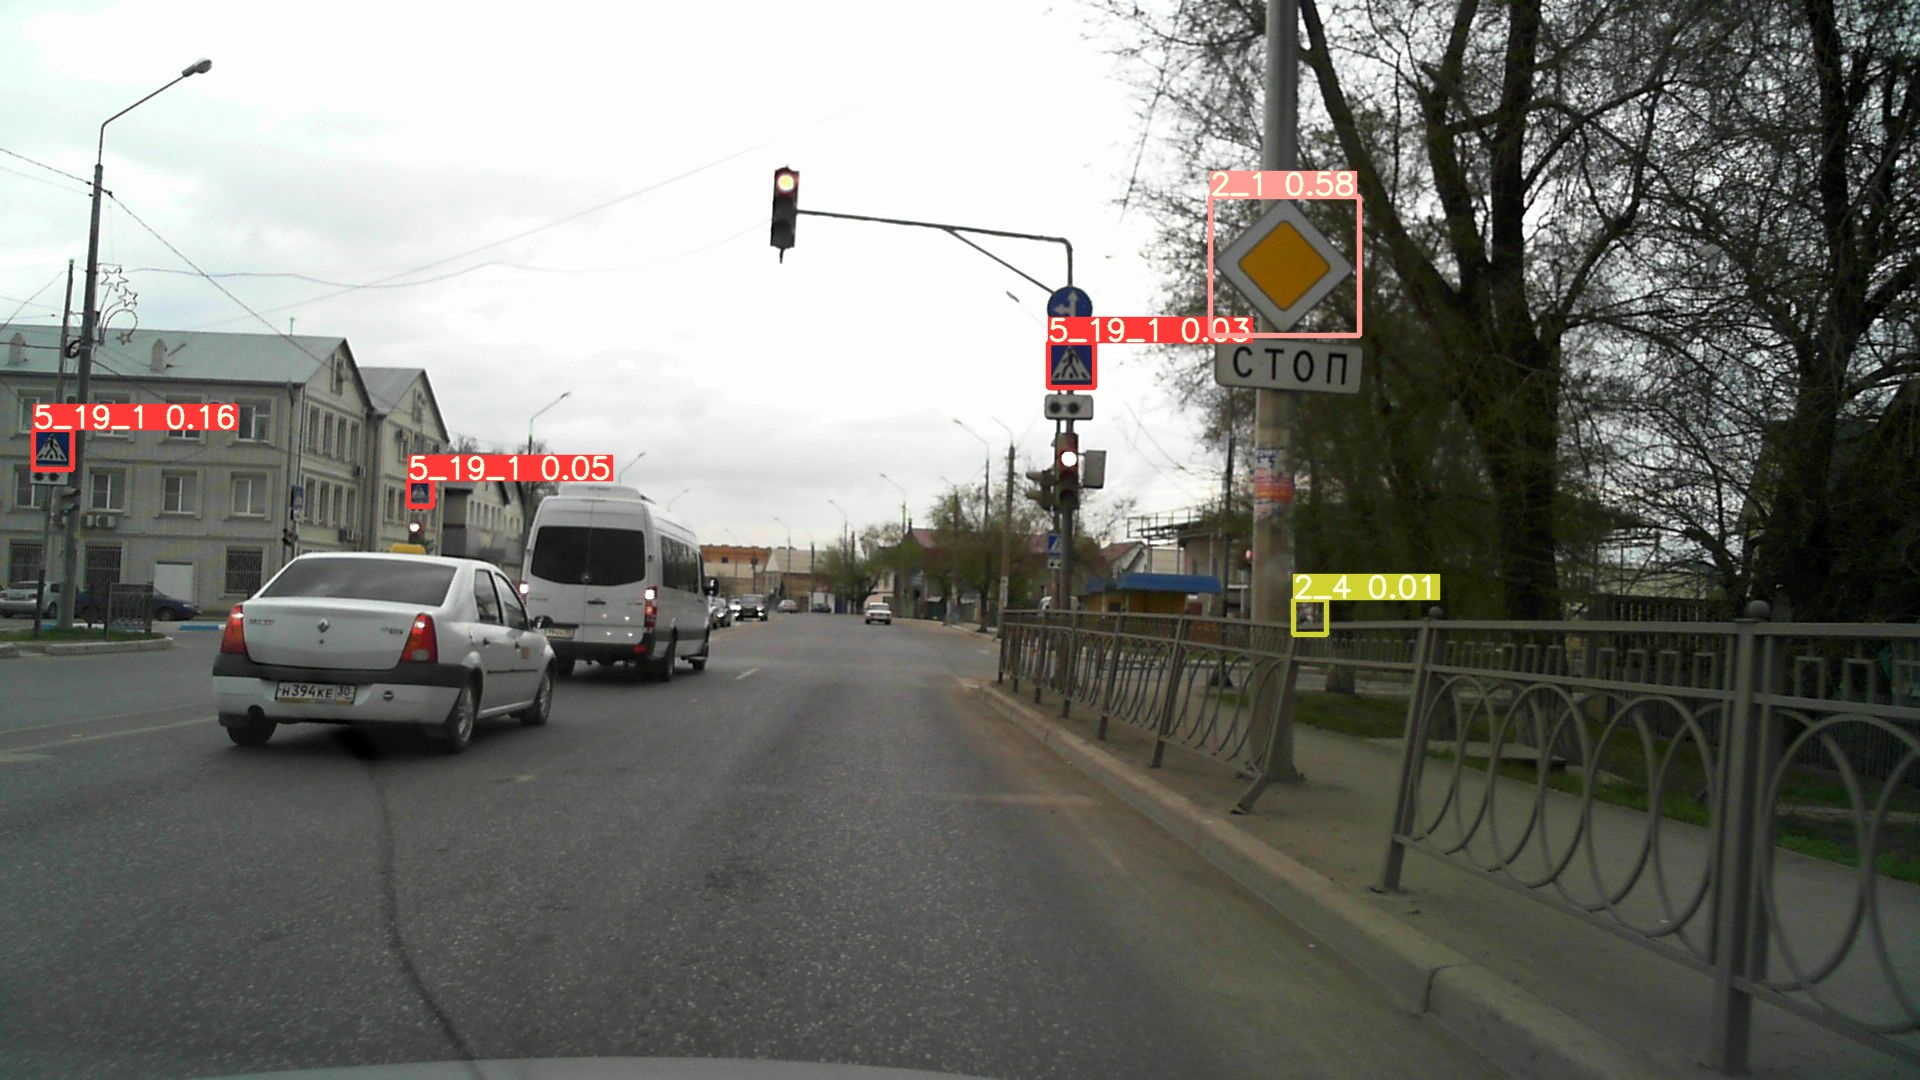

In [ ]:
Image(filename='runs/detect/exp29/test_1.jpg', width=640)


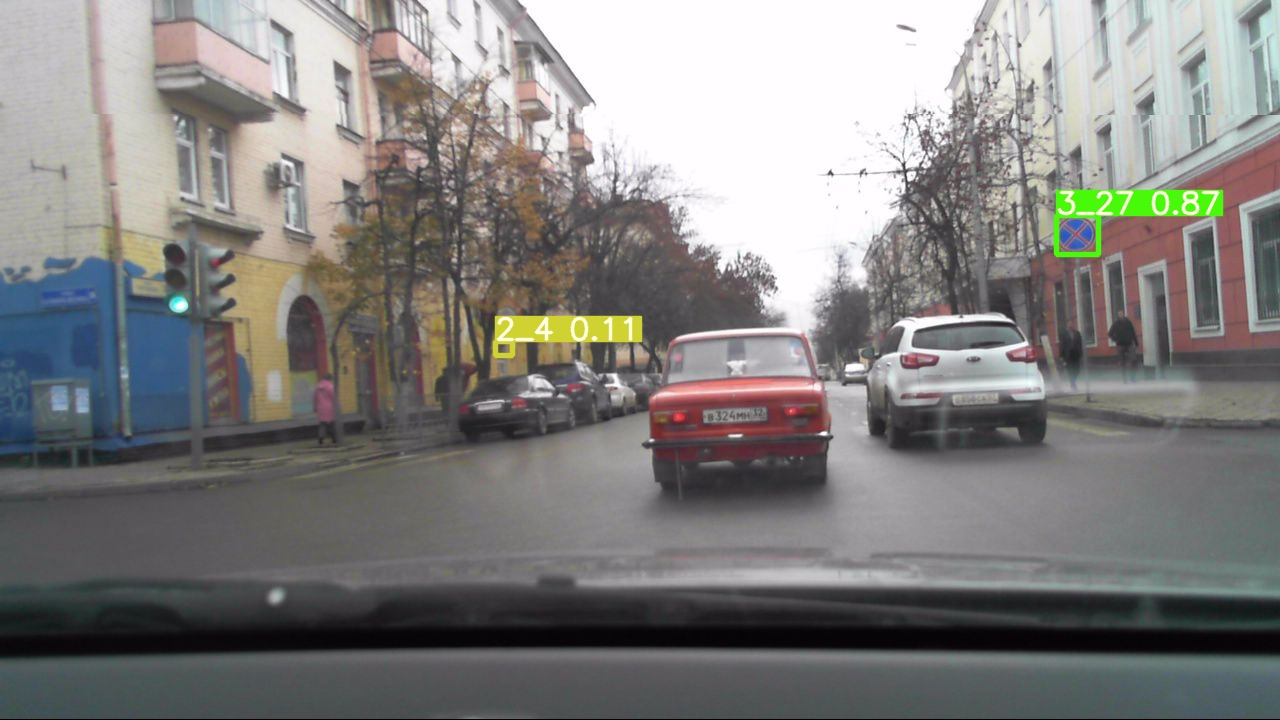

In [ ]:
Image(filename='runs/detect/exp29/test_2.jpg', width=640)


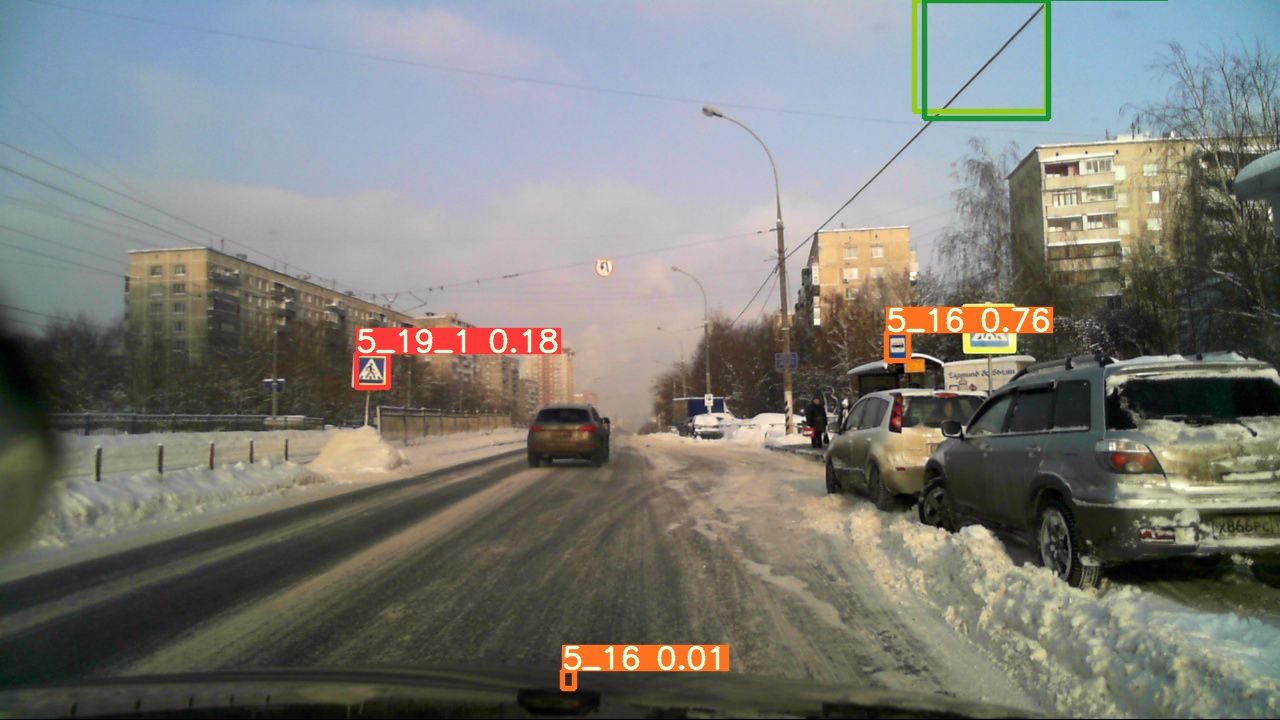

In [ ]:
Image(filename='runs/detect/exp29/test_3.jpg', width=640)


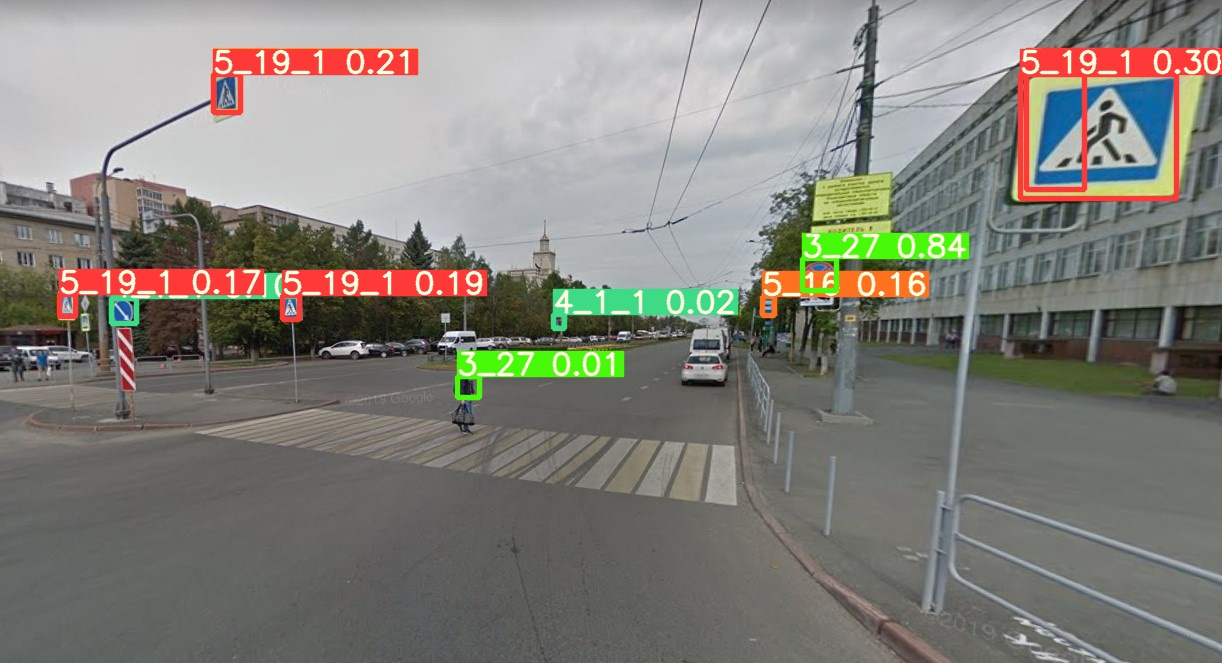

In [ ]:
Image(filename='runs/detect/exp29/test_4.jpg', width=640)

In [ ]:
!python detect.py --weights ./runs/train/yolov5l_rtsd2000_2/weights/best.pt --img 640 --conf 0.1 --source data/video/VID_001.MOV


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/video/VID_001.MOV', update=False, view_img=False, weights=['./runs/train/yolov5l_rtsd2000_2/weights/best.pt'])
YOLOv5 🚀 2021-5-18 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 392 layers, 46649031 parameters, 0 gradients, 114.2 GFLOPS
video 1/1 (1/4500) /content/drive/My Drive/Yolov5/yolov5/data/video/VID_001.MOV: 384x640 1 5_19_1, 1 5_16, Done. (0.026s)
video 1/1 (2/4500) /content/drive/My Drive/Yolov5/yolov5/data/video/VID_001.MOV: 384x640 1 5_19_1, 1 5_16, Done. (0.026s)
video 1/1 (3/4500) /content/drive/My Drive/Yolov5/yolov5/data/video/VID_001.MOV: 384x640 1 5_19_1, 1 5_16, Done. (0.025s)
video 1/1 (4/4500) /content/drive/My Drive/Yolov5/y